# Assessment Machine Learning and Statistics

Due: November 29th, 2019

# Remit

## (20%) Describe: 

Create a git repository and make it available online for the lecturer
to clone. The repository should contain all your work for this assessment. Within
the repository, create a jupyter [6] notebook that uses descriptive statistics and
plots to describe the Boston House Prices [1] dataset. This part is worth 20% of
your overall mark.


## (20%) Infer: 

To the above jupyter notebook, add a section where you use inferential
statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t. You should
explain and discuss your findings within the notebook. This part is also worth
20%.


## (60%) Predict: 

Again using the same notebook, use keras [7] to create a neural network
that can predict the median house price based on the other variables in the dataset.
You are free to interpret this as you wish — for example, you may use all the other
variables, or select a subset. This part is worth 60%.

# Boston House Prices Dataset 

## Attribute Information (in order):
|Column|Description  |
|---|---|
|CRIM     |per capita crime rate by town|
|ZN       |proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS    |proportion of non-retail business acres per town|
|CHAS     |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX      |nitric oxides concentration (parts per 10 million)|
|RM       |average number of rooms per dwelling|
|AGE      |proportion of owner-occupied units built prior to 1940|
|DIS      |weighted distances to five Boston employment centres|
|RAD      |index of accessibility to radial highways|
|TAX      |full-value property-tax rate per \$10,000|
|PTRATIO  |pupil-teacher ratio by town|
|B        |1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT    |\% lower status of the population|
|MEDV     |Median value of owner-occupied homes in $1000's|


Some clarification on some columns that was not initially obvious from the descriptions. 

  - LSTAT - Percentage of working class people in the area
  - MEDV - The actual prices of the properties

The next step is to get some idea as to the relationships of the various datapoints in the set. This is achieved by the scatter_matrix function by creating a matrix of plots of all the datapoints against one another and get a visual indication of their relationships.

## Descriptive Statistics

In order to run and asses the dataset with basic descriptive statistics we will proceed to load all the required libraries, including Pandas, Matplotlib Pyplot and Seaborn.

A copy of the Boston house price dataset in locate in a local folder data and is loaded using the pandas read_csv function. The first row is skipped as it contains meta data for the dataset. 

In [1]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning) # imported to suppress future deprecated warnings
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

df=pd.read_csv('data\\boston_house_prices.csv',skiprows=1)

The next step is running all the basic descriptive statistics on all the data columns available in the dataset. At this stage it is unclear what the columns mean and some research is required to determine what it means and discussed in the sections below.

In [2]:
#pl.ioff()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Looking at the raw descriptive statistics, after reading up on the various meanings of all the columns in itself does not really disclose that much. 

Visualisation tools however shows a much more visually descriptive picture of the dataset.

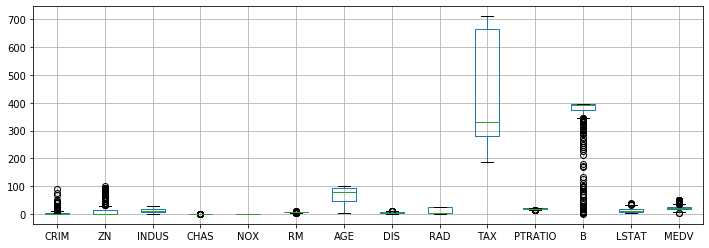

In [3]:
df.boxplot(figsize=(12,4))
pl.ion()

The different scaling of the dataset variables makes it difficult to compare and contrast correlations between various data point, so we can get a better comparative view by normalising all the values to the same range.

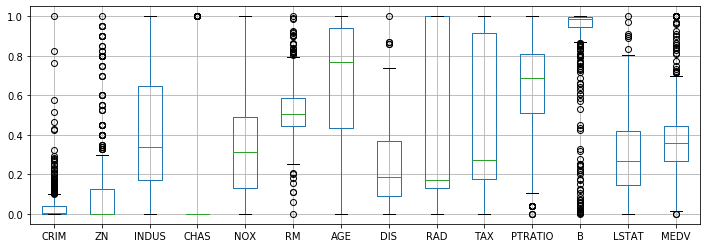

In [4]:
# import the pre processing library to normalise all the data values across the data set
from sklearn import preprocessing as pp
# set the minimum and maximum values to defaults of 0,1
minmax=pp.MinMaxScaler()
# dump the dataframe values to x
x=df.values
# transform the dumped values and return to variable scaled
scaled=minmax.fit_transform(x)
# convert back to  dataframe
df2=pd.DataFrame(scaled)
# export the heading to a list 
headings=list(df.columns.values)
# and add the heading back to the new normalised dataframe
df2.columns=headings
# and finally create another boxplot
df2.boxplot(figsize=(12,4))

Some reading show that this dataset is included in the sklearn library and insight into the dataset can be gained with the DESCR query into the dataset.

The table below shows a summary of the columns meaning extracted from the documentation on the dataset.

In [5]:
from pandas.plotting import scatter_matrix as sm
#%matplotlib inline
#sm(df, figsize=(18,9), diagonal='kde')


Analysing the scatter matrix of plots show some visually obvious relationships between various data points. The red lines show upward/positive trends and the yellow lines negative/downward trends.

![title](img/Boston_ScatterMatrix_Crop.jpg)

In [6]:
#pl.matshow(df.corr())
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


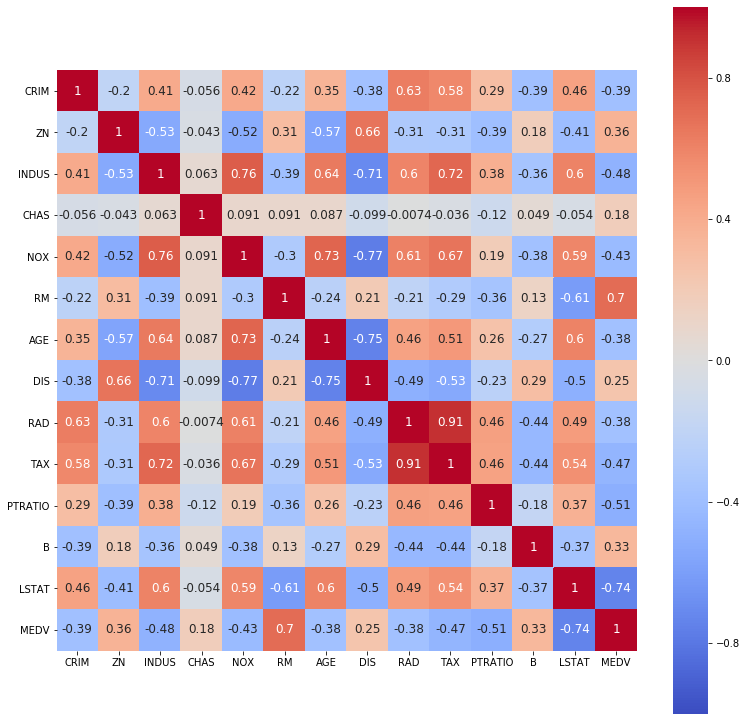

In [17]:
cor=df.corr()
#sns.heatmap?
pl.figure(figsize=(13,13))
sns.heatmap(cor, vmin=-1, vmax=1, center=0, xticklabels=cor.columns.values,
            square=True, cmap='coolwarm',
            yticklabels=cor.columns.values, annot=True, annot_kws={"size": 12})


## Inferential Statistics

[inferential statistcs](#Statistics)


## Predictive statistics using Keras

# References
## Statistics
1. https://socialresearchmethods.net/kb/statinf.php
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
## Markdown
1. https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
1. https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html
1. https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook
## Plotting
1. https://seaborn.pydata.org/generated/seaborn.regplot.html
## Keras
1. https://keras.io/
## Research 
1. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
1. https://www.ritchieng.com/machine-learning-project-boston-home-prices/
1. http://www.neural.cz/dataset-exploration-boston-house-pricing.html
1. [JOURNAL OF ENVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 (1978) ](docs/Hedonic%20Housing%20Prices%20and%20the%20Demand%20for%20Clean%20Air1%20.pdf)


## About the dataset

In [8]:
# This code block is for reference and contains the code to generate information bout the dataset.
from sklearn.datasets import load_boston
boston = load_boston()

# uncomment the lines below to generate the actual output

#print(boston.data.shape)
print(boston.DESCR) 
#print(boston.feature_names) 
#print(boston.filename)
#print(boston)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu